# Cleaning Image Dataset

This notebook shows how you can use fastdup to clean an image dataset.

## Installation & Setting Up

This notebook is written to be run on [Google Colab](https://colab.research.google.com/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb). If you're running fastdup locally, view the installation instructions for your operating system [here](https://visual-layer.readme.io/docs/installation).

In [ ]:
!pip install pip -U
!pip install fastdup matplotlib

## Download food-101 Dataset

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
!tar -xf food-101.tar.gz

## Import and Run fastdup

In [1]:
import fastdup
fastdup.__version__

'0.906'

In [2]:
fd = fastdup.create(work_dir="fastdup_food101_work_dir/", input_dir="food-101/images/")

> **NOTE**: If you're running this example on Google Colab, we recommend running with `num_images=40000` in the following cell. This limits fastdup to run on 40000 images instead of the entire dataset which takes shorter time to complete on Google Colab.

In [ ]:
fd.run(num_images=40000, ccthreshold=0.9)   # runs fastdup on a subset of 40000 images from the dataset
# fd.run(ccthreshold=0.9)                   # runs fastdup on the entire dataset

Get a summary of the run showing potentially problematic files.

In [5]:
fd.summary()


 ########################################################################################

Dataset Analysis Summary: 

    Dataset contains 40000 images
    Valid images are 100.00% (40,000) of the data, invalid are 0.00% (0) of the data
    Similarity:  1.26% (504) belong to 17 similarity clusters (components).
    98.74% (39,496) images do not belong to any similarity cluster.
    Largest cluster has 30 (0.07%) images.
    For a detailed analysis, use `.connected_components()`
(similarity threshold used is 0.9, connected component threshold used is 0.9).

    Outliers: 6.03% (2,411) of images are possible outliers, and fall in the bottom 5.00% of similarity values.
    For a detailed list of outliers, use `.outliers()`.


['Dataset contains 40000 images',
 'Valid images are 100.00% (40,000) of the data, invalid are 0.00% (0) of the data',
 'Similarity:  1.26% (504) belong to 17 similarity clusters (components).',
 '98.74% (39,496) images do not belong to any similarity cluster.',
 'Largest cluster has 30 (0.07%) images.',
 'For a detailed analysis, use `.connected_components()`\n(similarity threshold used is 0.9, connected component threshold used is 0.9).\n',
 'Outliers: 6.03% (2,411) of images are possible outliers, and fall in the bottom 5.00% of similarity values.',
 'For a detailed list of outliers, use `.outliers()`.']

## Broken Images

The lowest hanging fruit is to find a list of broken images and remove them from your dataset. These images are most probably corrupted file and could not be loaded.

To get the broken images simply run

In [8]:
broken_images = fd.invalid_instances()
broken_images

Empty DataFrame
Columns: [img_filename, fastdup_id, error_code, is_valid]
Index: []

This dataset is a carefully curated, so we did not find any broken images.

## List of Broken Images
If there are broken images however, you can easily get a list of the images.

In [10]:
list_of_broken_images = broken_images['filename'].to_list()
list_of_broken_images

[]

## Duplicate Image Pairs

Show a gallery of duplicate image pairs. Distance of `1.0` indicate that the image pairs are exact copies.

100%|██████████| 5/5 [00:00<00:00, 75.64it/s]


Stored similarity visual view in  fastdup_food101_work_dir/galleries/duplicates.html



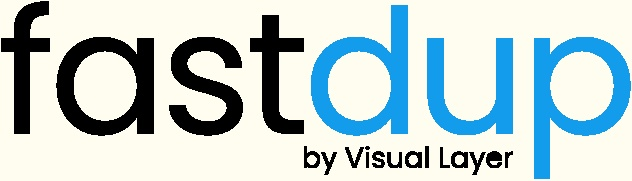
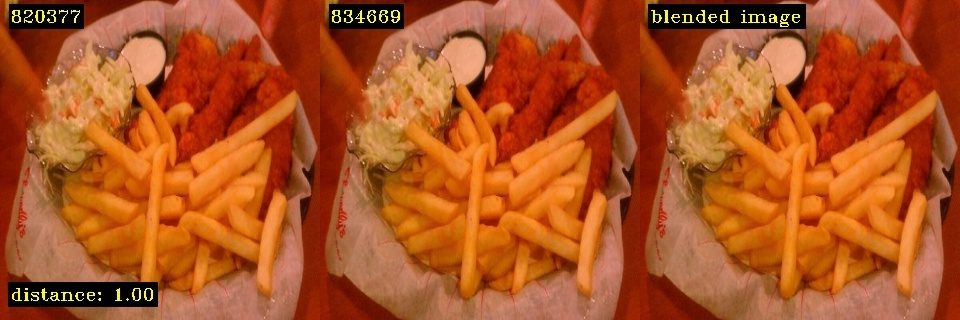
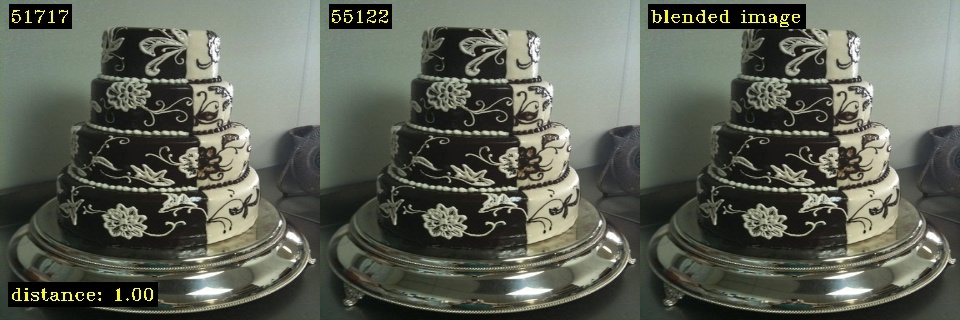
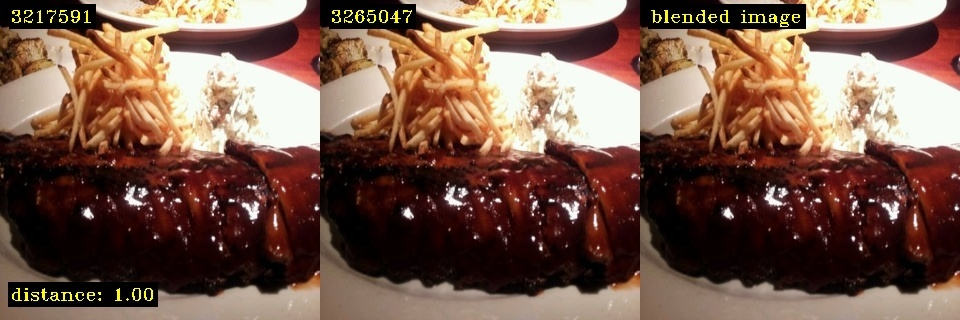
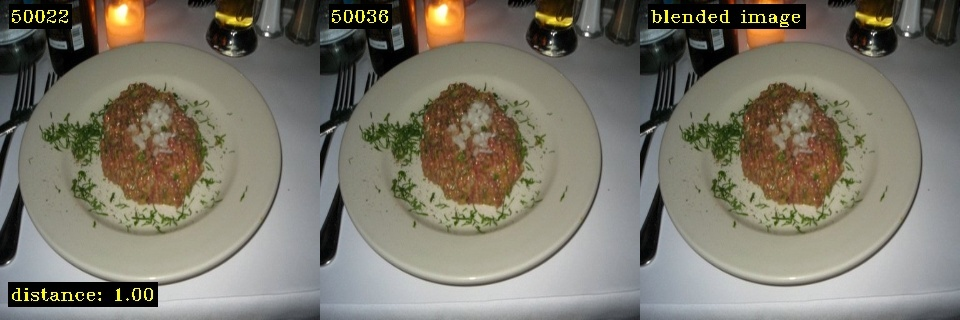
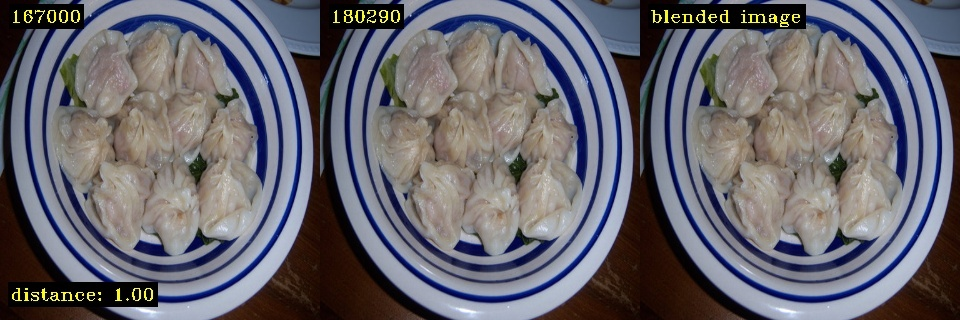

In [11]:
fd.vis.duplicates_gallery(num_images=5)

## Similar Image Clusters

Visualize image clusters from the dataset.

100%|██████████| 5/5 [00:00<00:00, 20.35it/s]


Finished OK. Components are stored as image files fastdup_food101_work_dir/galleries/components_[index].jpg
Stored components visual view in  fastdup_food101_work_dir/galleries/components.html
Execution time in seconds 2.5



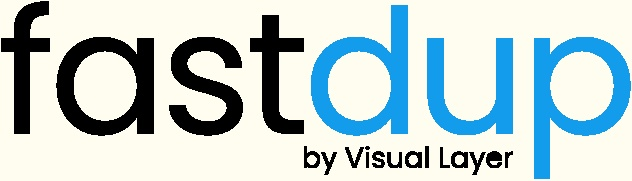
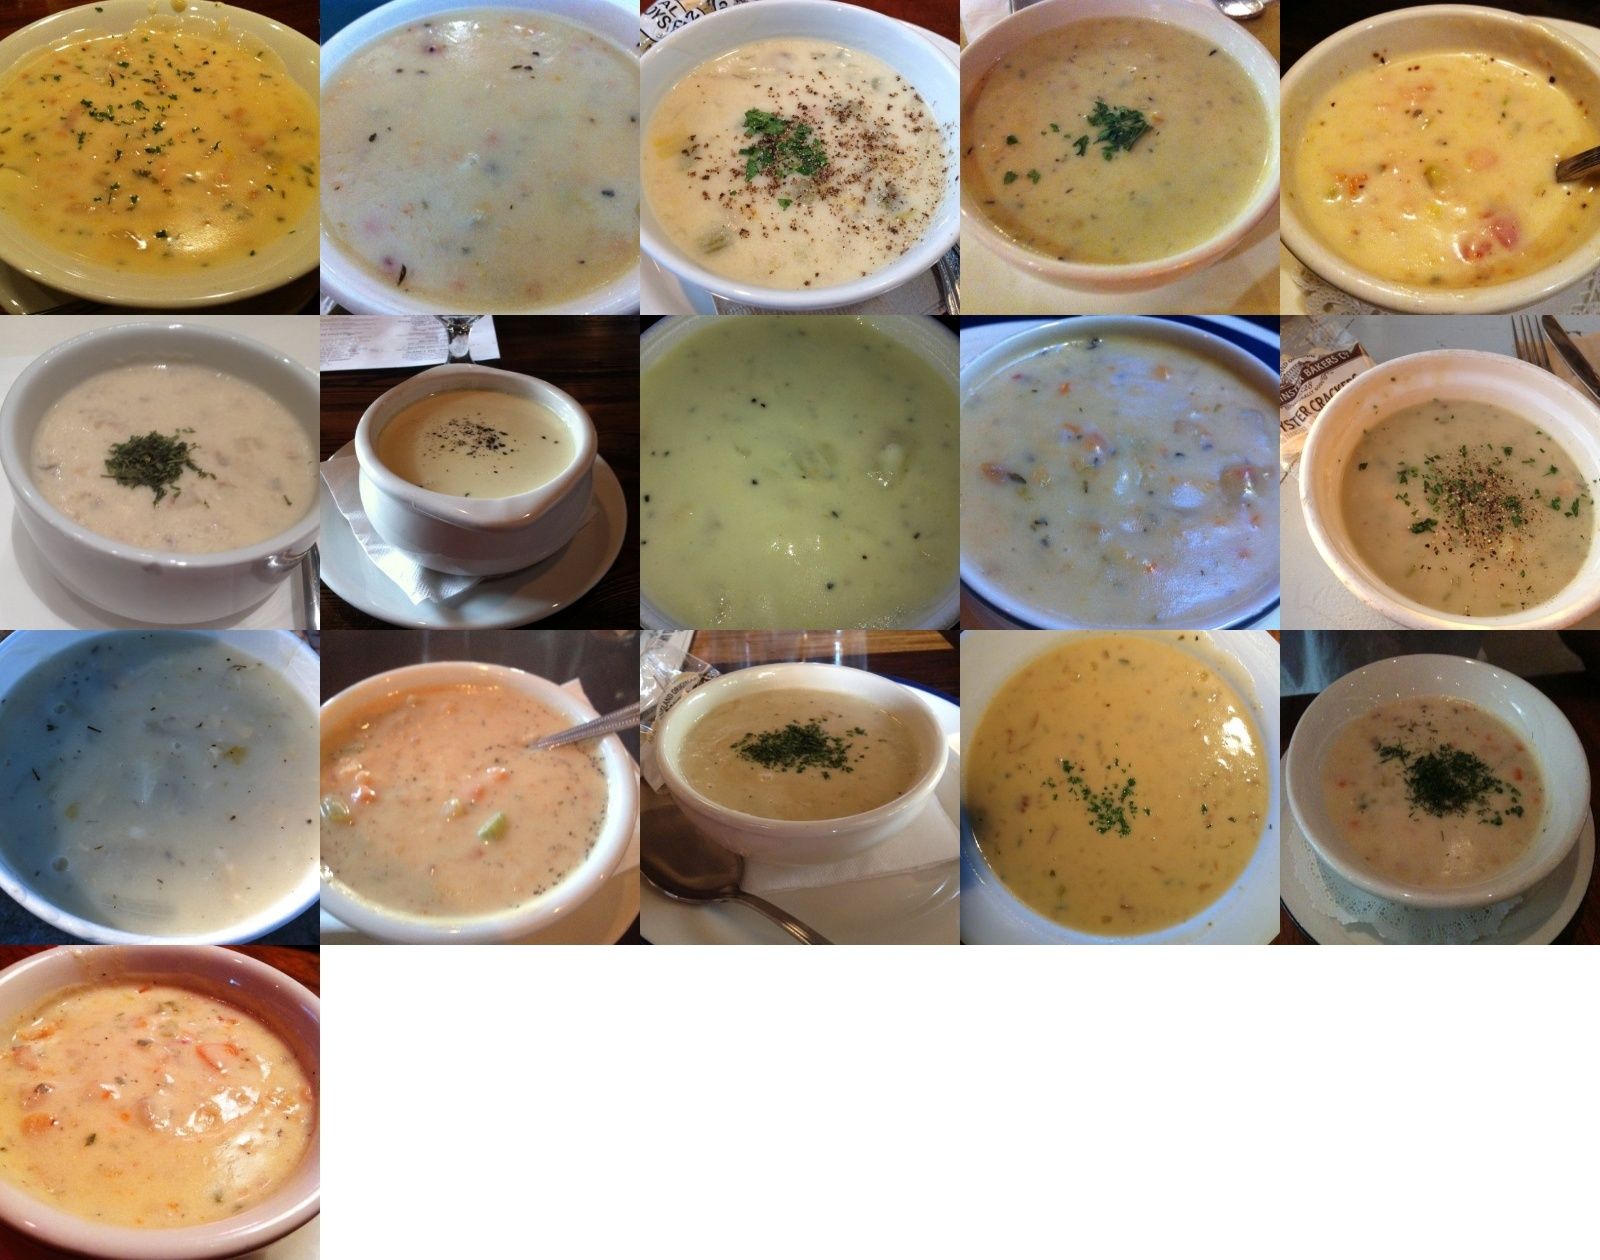
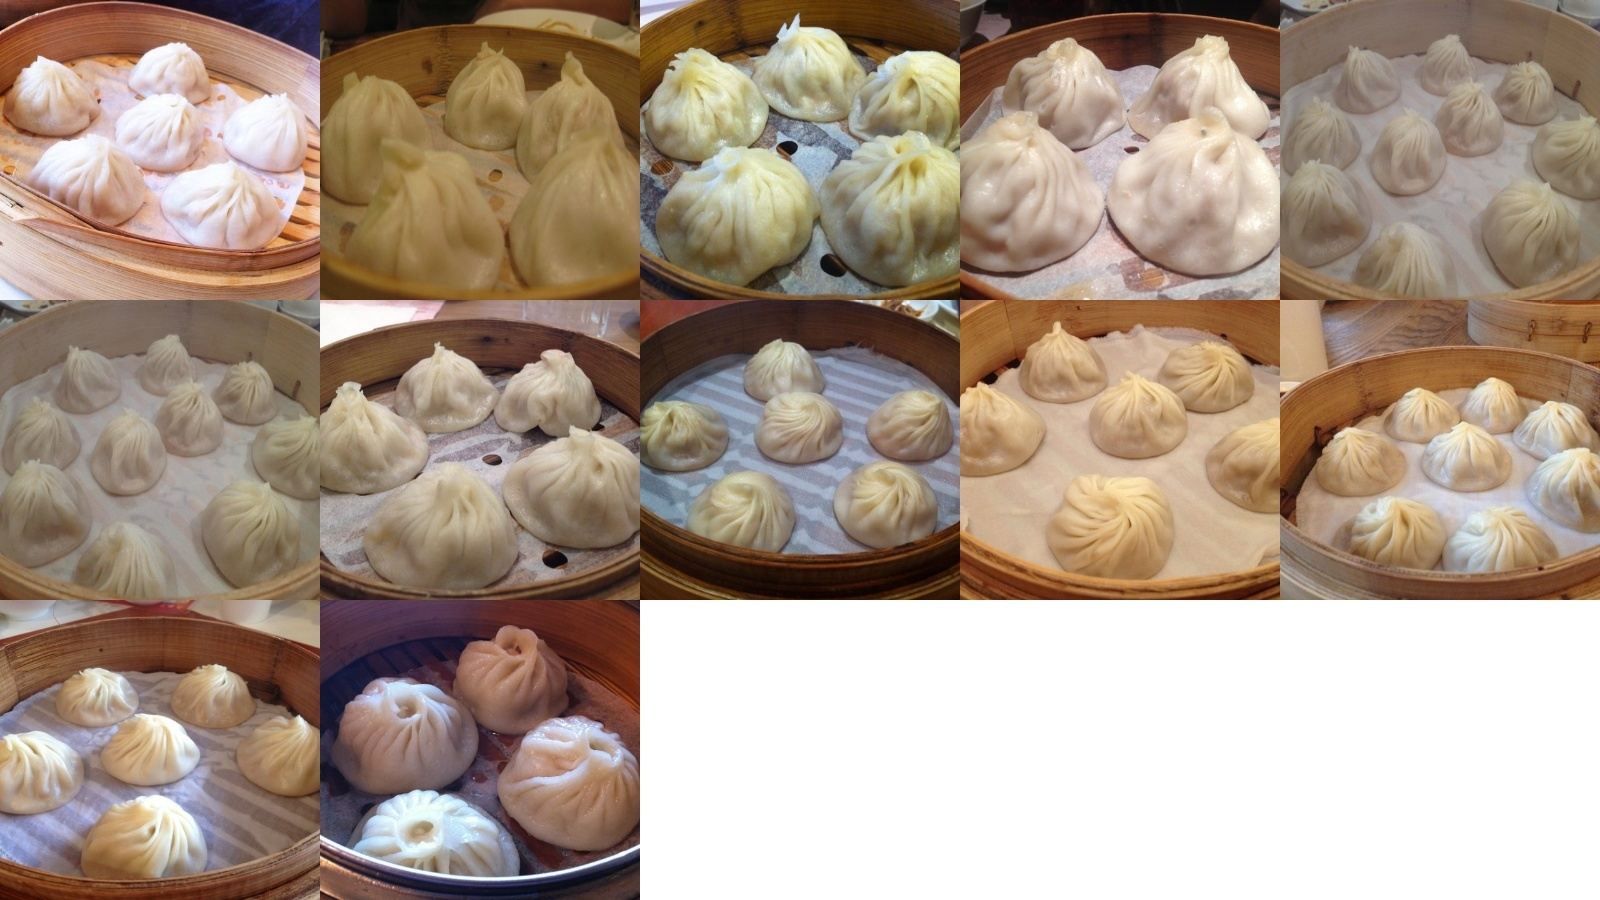
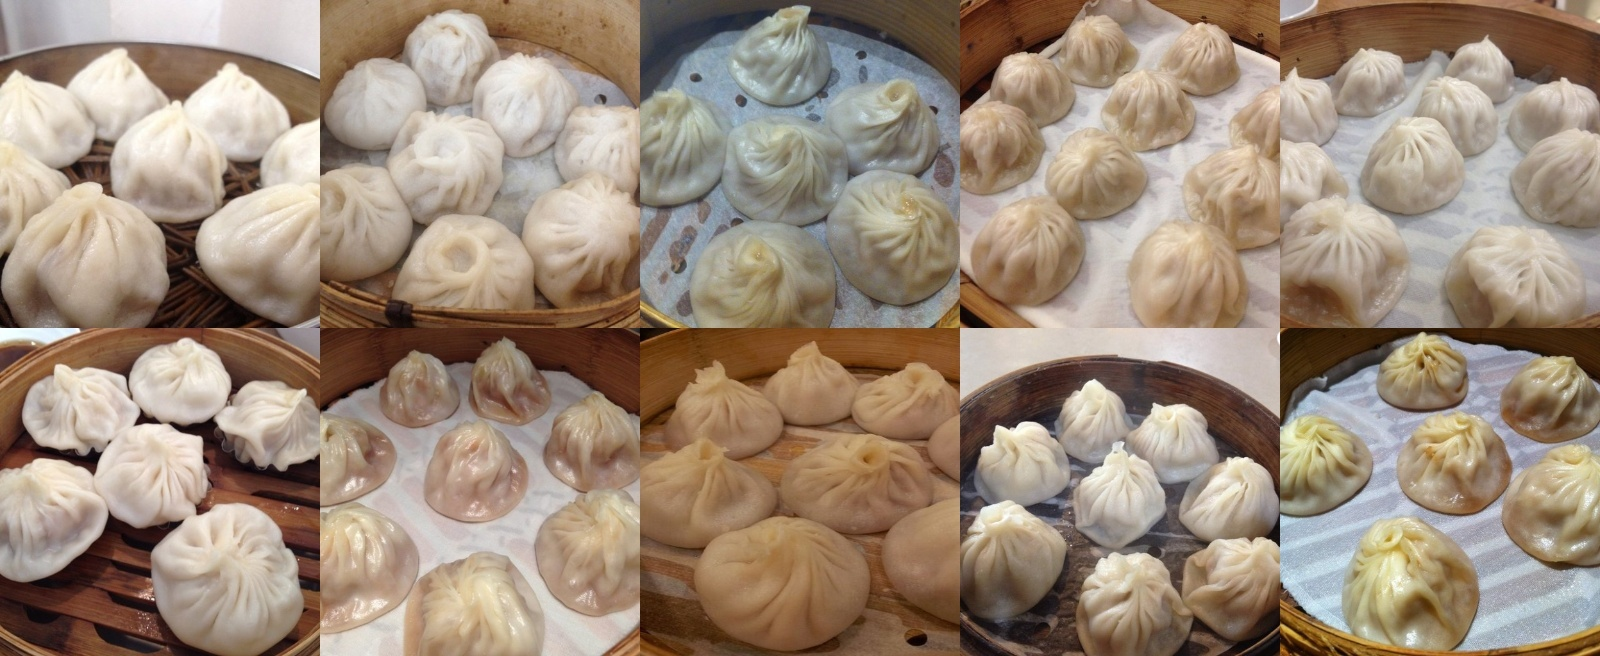
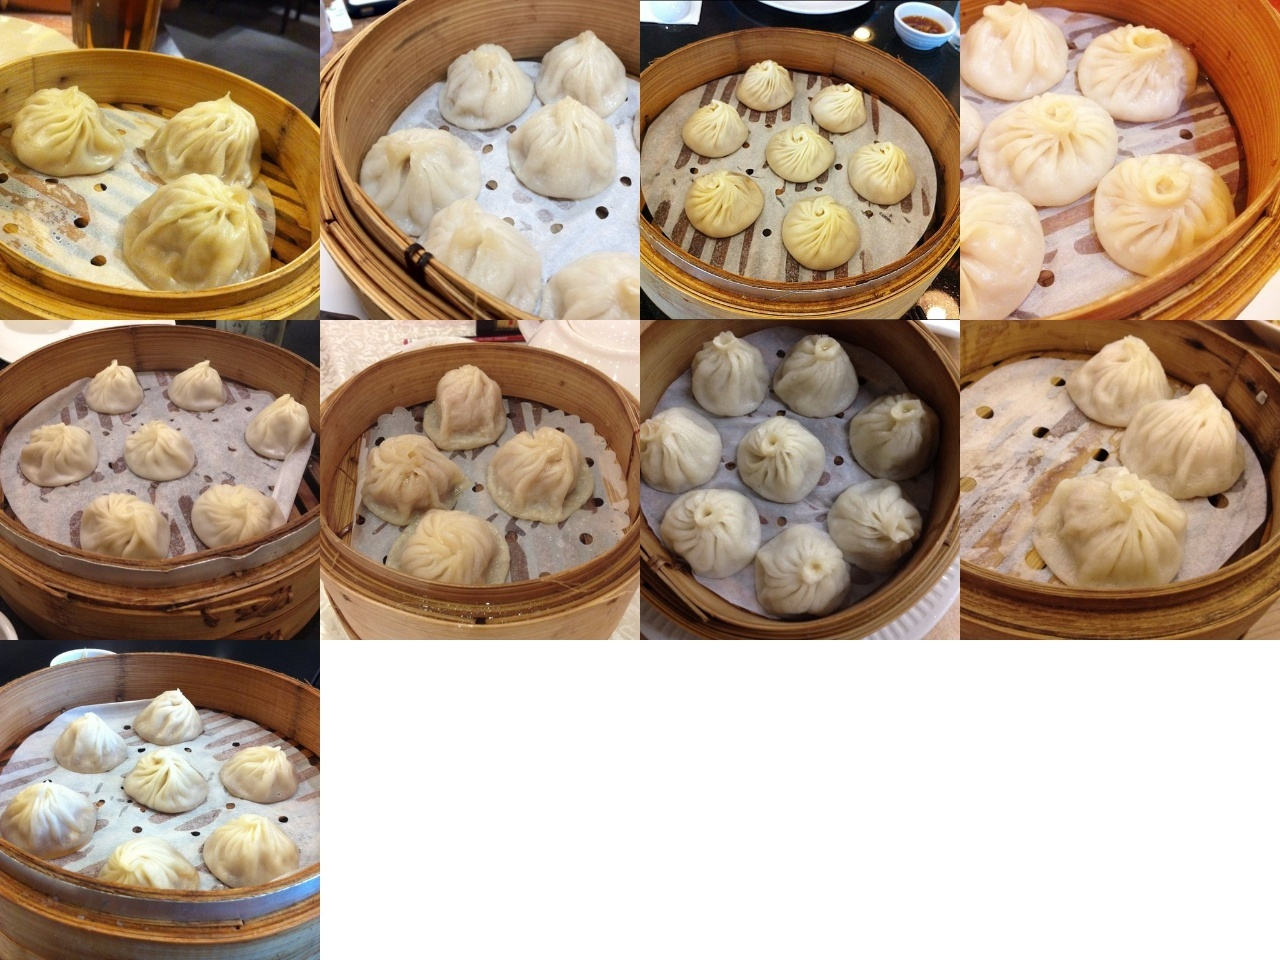
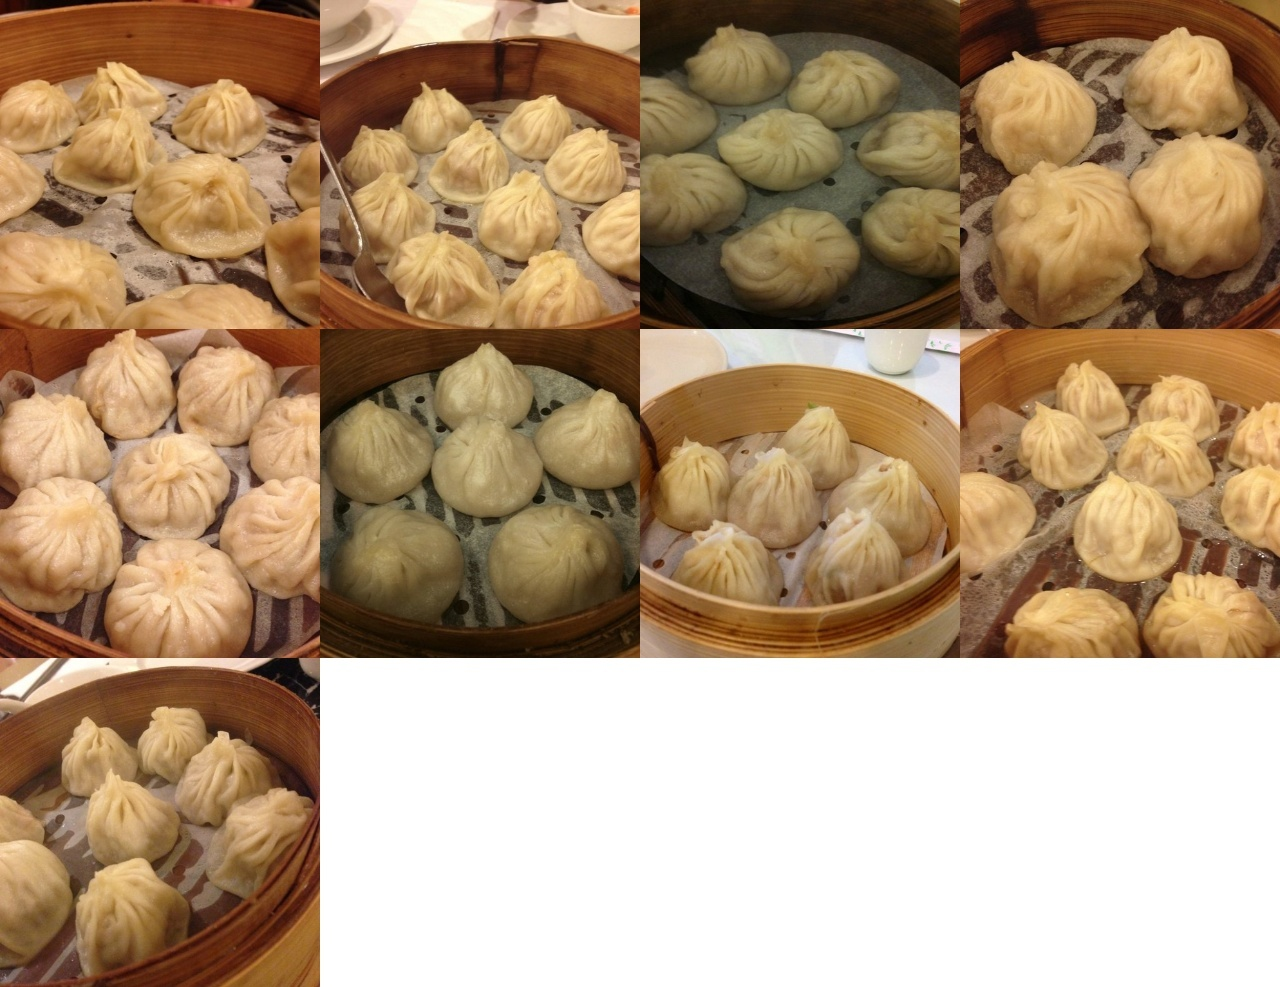

In [13]:
fd.vis.component_gallery(num_images=5)

## List of Duplicates
Now let's single out all duplicates and near-duplicates by running using the connected components function:



In [14]:
connected_components_df , _ = fd.connected_components()
connected_components_df.head()

fastdup_id  component_id  sum  count  mean_distance  min_distance  \
0           0             0  0.0    0.0            0.0           0.0   
1           1             1  0.0    0.0            0.0           0.0   
2           2             2  0.0    0.0            0.0           0.0   
3           3             3  0.0    0.0            0.0           0.0   
4           4             4  0.0    0.0            0.0           0.0   

   max_distance           img_filename error_code  is_valid  
0           0.0  apple_pie/1005649.jpg      VALID      True  
1           0.0  apple_pie/1011328.jpg      VALID      True  
2           0.0   apple_pie/101251.jpg      VALID      True  
3           0.0  apple_pie/1014775.jpg      VALID      True  
4           0.0  apple_pie/1026328.jpg      VALID      True

Let's now write a utility function to get the clusters:

In [15]:
# a function to group connected components
def get_clusters(df, sort_by='count', min_count=2, ascending=False):
    # columns to aggregate
    agg_dict = {'filename': list, 'mean_distance': max, 'count': len}

    if 'label' in df.columns:
        agg_dict['label'] = list
    
    # filter by count
    df = df[df['count'] >= min_count]
    
    # group and aggregate columns
    grouped_df = df.groupby('component_id').agg(agg_dict)
    
    # sort
    grouped_df = grouped_df.sort_values(by=[sort_by], ascending=ascending)
    return grouped_df

In [16]:
clusters_df = get_clusters(connected_components_df)
clusters_df.head()

img_filename  \
component_id                                                                                                                                                                                                                                                                                                                                                                                                                                 
23830         [clam_chowder/1072684.jpg, clam_chowder/1113834.jpg, clam_chowder/1322415.jpg, clam_chowder/1437241.jpg, clam_chowder/2113399.jpg, clam_chowder/2140703.jpg, clam_chowder/2248997.jpg, clam_chowder/2361787.jpg, clam_chowder/2398168.jpg, clam_chowder/2542800.jpg, clam_chowder/2685745.jpg, clam_chowder/2770581.jpg, clam_chowder/3914755.jpg, clam_chowder/546975.jpg, clam_chowder/75800.jpg, clam_chowder/854517.jpg]   
31637                                                                                                                                                   [dumplings/1045500.jpg, dumplings/140004.jpg, dumplings/1630799.jpg, dumplings/1695231.jpg, dumplings/1848359.jpg, dumplings/1872410.jpg, dumplings/1918394.jpg, dumplings/2524385.jpg, dumplings/3683752.jpg, dumplings/3739057.jpg, dumplings/3781725.jpg, dumplings/468796.jpg]   
31767                                                                                                                                                                                                [dumplings/1450685.jpg, dumplings/1564985.jpg, dumplings/2500721.jpg, dumplings/2600333.jpg, dumplings/2606645.jpg, dumplings/2675187.jpg, dumplings/3030550.jpg, dumplings/3242297.jpg, dumplings/3532122.jpg, dumplings/625116.jpg]   
31760                                                                                                                                                                                                                       [dumplings/1433645.jpg, dumplings/1813271.jpg, dumplings/1881086.jpg, dumplings/1998135.jpg, dumplings/2229749.jpg, dumplings/2561548.jpg, dumplings/2750447.jpg, dumplings/3363745.jpg, dumplings/834049.jpg]   
31699                                                                                                                                                                                                                        [dumplings/1228546.jpg, dumplings/1270308.jpg, dumplings/231028.jpg, dumplings/2373653.jpg, dumplings/2571523.jpg, dumplings/263589.jpg, dumplings/2909040.jpg, dumplings/2950605.jpg, dumplings/3191742.jpg]   

              mean_distance  count  
component_id                        
23830                0.9163     16  
31637                0.9302     12  
31767                0.9127     10  
31760                0.9119      9  
31699                0.9180      9

The above shows the component (clusters) with the highest duplicates/near-duplicates.

Now let's keep one image from each cluster and remove the rest:



In [21]:
# First sample from each cluster that is kept
cluster_images_to_keep = []
list_of_duplicates = []

for cluster_file_list in clusters_df.filename:
    # keep first file, discard rest
    keep = cluster_file_list[0]
    discard = cluster_file_list[1:]
    
    cluster_images_to_keep.append(keep)
    list_of_duplicates.extend(discard)

print(f"Found {len(set(list_of_duplicates))} highly similar images to discard")

Found 610 highly similar images to discard


In [22]:
list_of_duplicates

['clam_chowder/1113834.jpg',
 'clam_chowder/1322415.jpg',
 'clam_chowder/1437241.jpg',
 'clam_chowder/2113399.jpg',
 'clam_chowder/2140703.jpg',
 'clam_chowder/2248997.jpg',
 'clam_chowder/2361787.jpg',
 'clam_chowder/2398168.jpg',
 'clam_chowder/2542800.jpg',
 'clam_chowder/2685745.jpg',
 'clam_chowder/2770581.jpg',
 'clam_chowder/3914755.jpg',
 'clam_chowder/546975.jpg',
 'clam_chowder/75800.jpg',
 'clam_chowder/854517.jpg',
 'dumplings/140004.jpg',
 'dumplings/1630799.jpg',
 'dumplings/1695231.jpg',
 'dumplings/1848359.jpg',
 'dumplings/1872410.jpg',
 'dumplings/1918394.jpg',
 'dumplings/2524385.jpg',
 'dumplings/3683752.jpg',
 'dumplings/3739057.jpg',
 'dumplings/3781725.jpg',
 'dumplings/468796.jpg',
 'dumplings/1564985.jpg',
 'dumplings/2500721.jpg',
 'dumplings/2600333.jpg',
 'dumplings/2606645.jpg',
 'dumplings/2675187.jpg',
 'dumplings/3030550.jpg',
 'dumplings/3242297.jpg',
 'dumplings/3532122.jpg',
 'dumplings/625116.jpg',
 'dumplings/1813271.jpg',
 'dumplings/1881086.jpg',


## Outliers

Visualize a gallery of outliers. Lower `Distance` value indicates higher chances of outliers.

100%|██████████| 5/5 [00:00<00:00, 6101.69it/s]


Stored outliers visual view in  fastdup_food101_work_dir/galleries/outliers.html



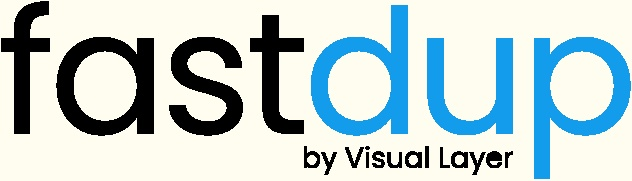
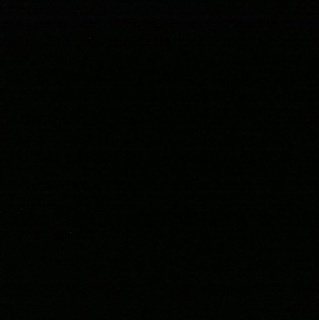
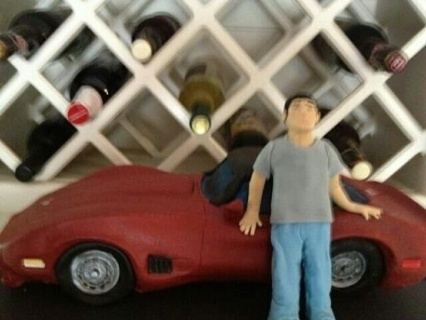
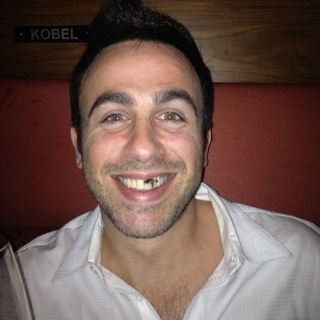
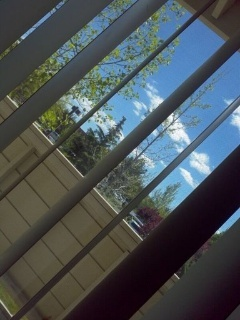
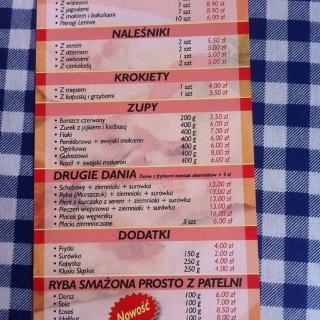

In [23]:
fd.vis.outliers_gallery(num_images=5)

# List of Outliers
Let's first get the outliers `DataFrame`:

In [24]:
outlier_df = fd.outliers()
outlier_df.head()

index  outlier  nearest  distance          img_filename_outlier  \
0   3999     9797    27221  0.295020  breakfast_burrito/462294.jpg   
1   3997    21410    37470  0.556575    chocolate_cake/2518457.jpg   
2   3995    11063    16727  0.563040      caesar_salad/1303023.jpg   
3   3994    21885     2669  0.564055     chocolate_cake/577717.jpg   
4   3992    32123    31207  0.578329         dumplings/1339572.jpg   

  error_code_outlier  is_valid_outlier      img_filename_nearest  \
0              VALID              True  creme_brulee/1661605.jpg   
1              VALID              True  filet_mignon/2685908.jpg   
2              VALID              True     cheesecake/358018.jpg   
3              VALID              True       baklava/3363412.jpg   
4              VALID              True        donuts/1750980.jpg   

  error_code_nearest  is_valid_nearest  
0              VALID              True  
1              VALID              True  
2              VALID              True  
3              VALID              True  
4              VALID              True

Let's treat all images with `distance<0.68` as outliers.

In [25]:
list_of_outliers = outlier_df[outlier_df.distance < 0.68].filename_outlier.tolist()
list_of_outliers

['breakfast_burrito/462294.jpg',
 'chocolate_cake/2518457.jpg',
 'caesar_salad/1303023.jpg',
 'chocolate_cake/577717.jpg',
 'dumplings/1339572.jpg',
 'bibimbap/2594394.jpg',
 'ceviche/2363511.jpg',
 'churros/2327883.jpg',
 'chicken_wings/693809.jpg',
 'foie_gras/3776193.jpg',
 'chicken_curry/2523126.jpg',
 'churros/1440917.jpg',
 'creme_brulee/1661605.jpg',
 'apple_pie/484038.jpg',
 'foie_gras/33258.jpg',
 'cheesecake/2160930.jpg',
 'cheesecake/1955517.jpg',
 'chicken_curry/789540.jpg',
 'cup_cakes/451074.jpg',
 'cup_cakes/1005580.jpg',
 'bread_pudding/1375816.jpg',
 'chocolate_mousse/2177988.jpg',
 'bruschetta/1883187.jpg',
 'chocolate_cake/3600589.jpg',
 'apple_pie/236966.jpg',
 'caprese_salad/2719211.jpg',
 'bibimbap/3230839.jpg',
 'apple_pie/2008772.jpg',
 'edamame/2979095.jpg',
 'fish_and_chips/1566646.jpg',
 'cup_cakes/601989.jpg',
 'filet_mignon/2685908.jpg',
 'baklava/3236360.jpg',
 'baby_back_ribs/1676135.jpg',
 'cup_cakes/2590269.jpg',
 'chocolate_cake/2814515.jpg',
 'churros

## Dark, Bright and Blurry Images

Visualize image with statistical metrics.

Visualize dark images from the dataset in ascending order.

100%|██████████| 5/5 [00:00<00:00, 344.18it/s]


Stored mean visual view in  fastdup_food101_work_dir/galleries/mean.html



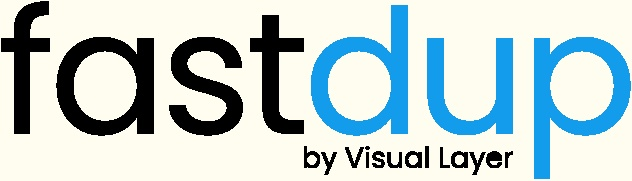
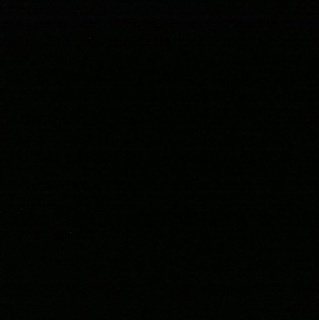
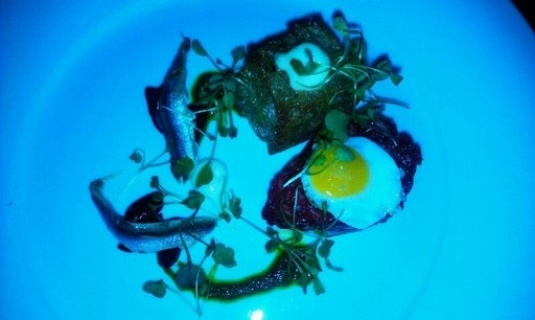
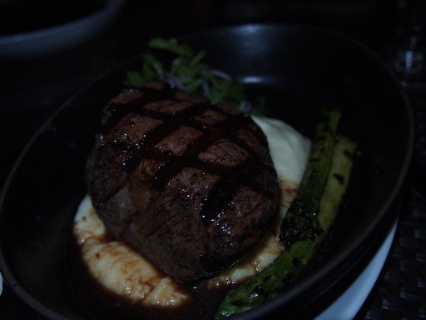
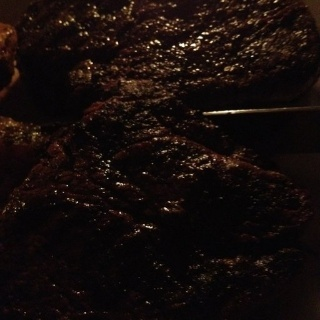
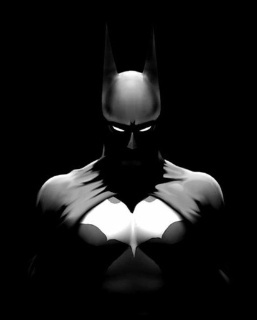

In [27]:
fd.vis.stats_gallery(metric='dark', num_images=5)

# List of Dark Images
Get a `DataFrame` of image statistics.

In [28]:
stats_df = fd.img_stats()

If an image has a mean<13 then we conclude it's a dark image:

In [29]:
dark_images = stats_df[stats_df['mean'] < 13]  
dark_images

fastdup_id  img_w  img_h  unique      blur    mean  min    max     stdv  \
3090        3090    512    306       0  535.7338  5.5205  0.0  255.0  15.3110   
9797        9797    511    512       0    9.0875  1.8431  0.0   30.0   1.0524   

      file_size  contrast                  img_filename error_code  is_valid  
3090      27433       1.0    beef_carpaccio/1259270.jpg      VALID      True  
9797       8693       1.0  breakfast_burrito/462294.jpg      VALID      True

To get a list of the dark images:

In [30]:
list_of_dark_images = dark_images['filename'].to_list()
list_of_dark_images

['beef_carpaccio/1259270.jpg', 'breakfast_burrito/462294.jpg']

# List of Bright Images

Visualize bright images from the dataset in descending order.

100%|██████████| 5/5 [00:00<00:00, 304.74it/s]


Stored mean visual view in  fastdup_food101_work_dir/galleries/mean.html



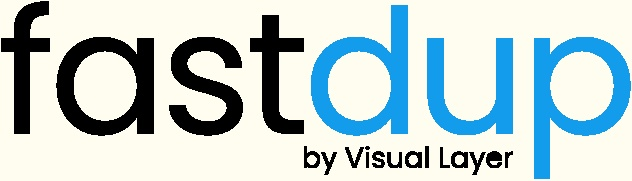
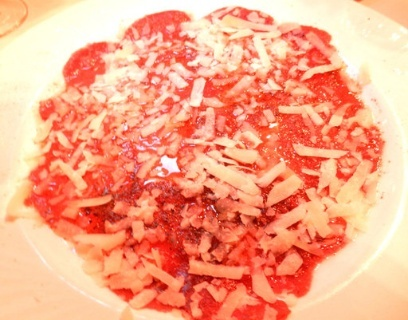
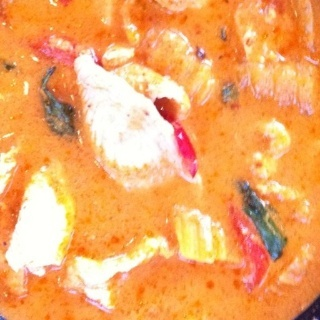
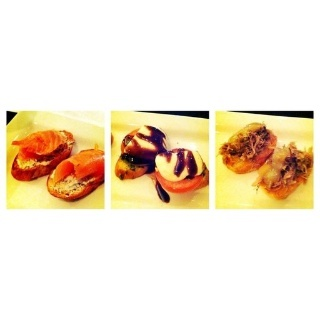
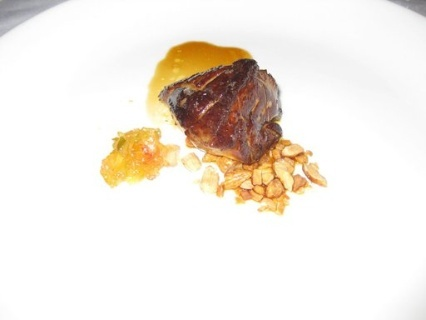
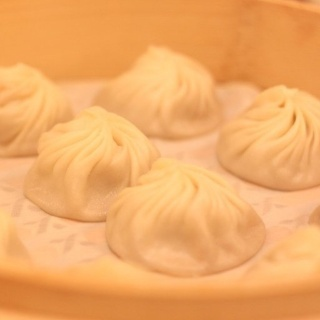

In [31]:
fd.vis.stats_gallery(metric='bright', num_images=5)


Let's set that if mean>220.5 we will conclude it's a bright image

In [33]:
bright_images = stats_df[stats_df['mean'] > 220.5]
bright_images.head()

fastdup_id  img_w  img_h  unique       blur      mean  min    max  \
81            81    512    512       0   538.6821  225.8266  0.0  255.0   
436          436    512    512       0  1245.6737  220.9703  0.0  255.0   
589          589    512    512       0  1468.0642  227.5742  0.0  255.0   
933          933    512    512       0   554.9135  232.6887  0.0  255.0   
1115        1115    512    512       0  1219.0579  230.7839  0.0  255.0   

         stdv  file_size  contrast                img_filename error_code  \
81    32.2799      32229       1.0       apple_pie/1289014.jpg      VALID   
436   40.3034      40344       1.0       apple_pie/2601590.jpg      VALID   
589   41.6247      50437       1.0       apple_pie/2997124.jpg      VALID   
933   41.5226      41395       1.0        apple_pie/817552.jpg      VALID   
1115  32.7307      52154       1.0  baby_back_ribs/1395570.jpg      VALID   

      is_valid  
81        True  
436       True  
589       True  
933       True  
1115      True

Get a list of bright images

In [34]:
list_of_bright_images = bright_images['filename'].to_list()
list_of_bright_images

['apple_pie/1289014.jpg',
 'apple_pie/2601590.jpg',
 'apple_pie/2997124.jpg',
 'apple_pie/817552.jpg',
 'baby_back_ribs/1395570.jpg',
 'baby_back_ribs/3841100.jpg',
 'baklava/1542333.jpg',
 'baklava/2229944.jpg',
 'baklava/2663954.jpg',
 'beef_carpaccio/1364391.jpg',
 'beef_carpaccio/1713850.jpg',
 'beef_carpaccio/1990775.jpg',
 'beef_carpaccio/3169022.jpg',
 'beef_carpaccio/872076.jpg',
 'beef_tartare/1282738.jpg',
 'beef_tartare/1720794.jpg',
 'beef_tartare/3603995.jpg',
 'beef_tartare/717367.jpg',
 'beignets/1688450.jpg',
 'beignets/3723694.jpg',
 'beignets/529117.jpg',
 'bread_pudding/1256062.jpg',
 'bread_pudding/3660360.jpg',
 'bread_pudding/3716756.jpg',
 'breakfast_burrito/2840993.jpg',
 'breakfast_burrito/3635548.jpg',
 'bruschetta/1346725.jpg',
 'bruschetta/2275519.jpg',
 'bruschetta/3269901.jpg',
 'bruschetta/770721.jpg',
 'caesar_salad/2039808.jpg',
 'caesar_salad/2761224.jpg',
 'cannoli/1237436.jpg',
 'cannoli/1793781.jpg',
 'cannoli/2799600.jpg',
 'cannoli/2821147.jpg',
 

# List of Blurry Images

Visualize blurry images from the dataset in ascending order.

100%|██████████| 5/5 [00:00<00:00, 337.52it/s]


Stored blur visual view in  fastdup_food101_work_dir/galleries/blur.html



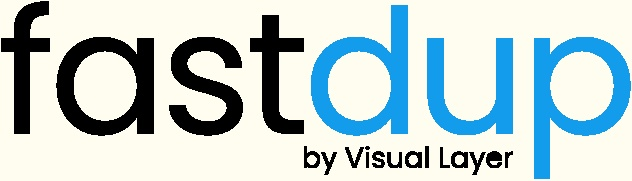
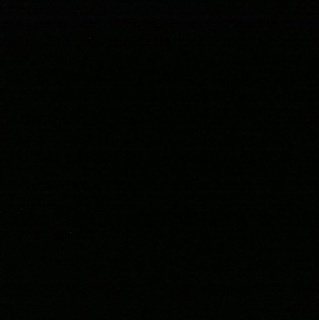
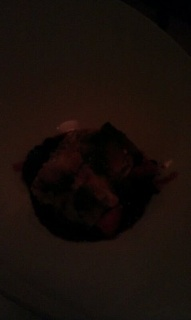
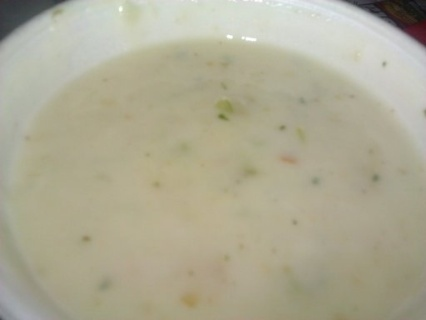
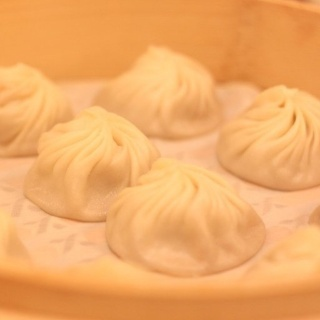
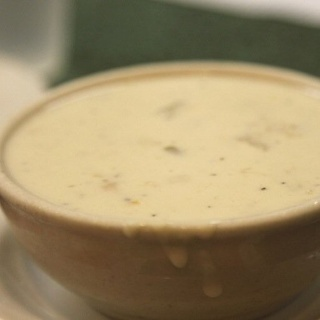

In [35]:
fd.vis.stats_gallery(metric='blur', num_images=5)

In [36]:
blurry_images = stats_df[stats_df['blur'] < 50]
blurry_images.head()

fastdup_id  img_w  img_h  unique     blur      mean   min    max  \
2123        2123    512    512       0  41.3781  116.2239   2.0  198.0   
2768        2768    384    512       0  45.5609  102.8172  40.0  226.0   
2829        2829    512    512       0  38.8840  214.0211  71.0  255.0   
2918        2918    512    512       0  47.2227  138.1602   0.0  255.0   
6924        6924    384    512       0  45.9959   75.9253   0.0  176.0   

         stdv  file_size  contrast         img_filename error_code  is_valid  
2123  30.7362      25479    0.9800  baklava/1413667.jpg      VALID      True  
2768  37.5435      18740    0.6992  baklava/3681797.jpg      VALID      True  
2829  25.0954      23869    0.5644  baklava/3877397.jpg      VALID      True  
2918  24.5464      22279    1.0000   baklava/683225.jpg      VALID      True  
6924  23.9812      19018    1.0000  beignets/726875.jpg      VALID      True

Get list of blurry images

In [37]:
list_of_blurry_images = blurry_images['filename'].to_list()
list_of_blurry_images

['baklava/1413667.jpg',
 'baklava/3681797.jpg',
 'baklava/3877397.jpg',
 'baklava/683225.jpg',
 'beignets/726875.jpg',
 'bread_pudding/444890.jpg',
 'breakfast_burrito/462294.jpg',
 'carrot_cake/345630.jpg',
 'chocolate_mousse/1653769.jpg',
 'clam_chowder/1472641.jpg',
 'clam_chowder/2250407.jpg',
 'clam_chowder/908590.jpg',
 'dumplings/2174768.jpg']

## Summary

In [38]:
print(f"Broken: {len(list_of_broken_images)}")
print(f"Duplicates: {len(list_of_duplicates)}")
print(f"Outliers: {len(list_of_outliers)}")
print(f"Dark: {len(list_of_dark_images)}")
print(f"Bright: {len(list_of_bright_images)}")
print(f"Blurry: {len(list_of_blurry_images)}")

problem_images = list_of_duplicates + list_of_broken_images + list_of_outliers + list_of_dark_images + list_of_bright_images + list_of_blurry_images

print(f"Total unique images: {len(set(problem_images))}")

Broken: 0
Duplicates: 610
Outliers: 112
Dark: 2
Bright: 93
Blurry: 13
Total unique images: 826


In this tutorial, we've seen how to use fastdup to analyze an image dataset for potential problems such as broken image, duplicate, outliers and dark/bright/blurry image.

For each problem we got a list of file names for further action. Depending on use cases, you might choose to delete the image, relabel them or simply move the image elsewhere.